# Synthesis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import hazel
print(hazel.__version__)
label = ['I', 'Q', 'U', 'V']

/scratch/miniconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2018.06.07


$B_x$, $B_y$, $B_z$, $\tau$, $v$, $\Delta v$, $\beta$, $a$.

In [5]:
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10825, 10835, 150], 'topology': 'ph1->ch1',
    'LOS': [0.0,0.0,90.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10835]})
mod.add_photosphere({'Name': 'ph1', 'Spectral region': 'spec1', 'Spectral lines': [300], 
                      'Wavelength': [10825, 10835], 'Reference atmospheric model': '../models/photospheres/model_photosphere.1d'})
mod.add_parametric({'Name': 'te1', 'Spectral region': 'spec1', 'Type': 'Voigt',
    'Wavelength': [10830, 10835]})

mod.atmospheres['te1'].set_parameters([10833, 0.25, 0.4, 0.0], 1.0)

mod.setup()

In [6]:
tau = 0.5
v = 10.0
deltav = 8.0
beta = 1.0
a = 0.0

model = mod.atmospheres['ph1'].get_parameters()

/scratch/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


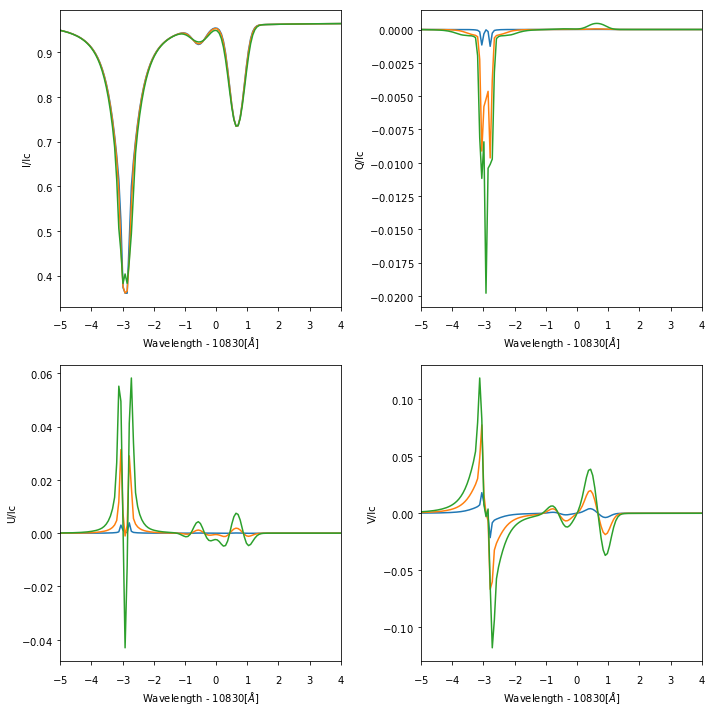

In [7]:
f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
fields = [100, 500, 1000]
for j in range(len(fields)):
    
    # Set the field in the chromosphere
    Bx = fields[j]
    By = fields[j]
    Bz = fields[j]
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,v,deltav,beta,a], 1.0)
    
    model[:,5] = fields[j]
    model[:,6] = fields[j]
    model[:,7] = fields[j]
    mod.atmospheres['ph1'].set_parameters(model, 1.0)
    
    mod.synthesize()
    
    for i in range(4):        
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis - 10830, mod.spectrum['spec1'].stokes[i,:])

for i in range(4):
    ax[i].set_xlabel('Wavelength - 10830[$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([-5,4])
    
pl.tight_layout()